# <핵심만 요약한 데이터 조작과 시각화 파이썬 코드북>
**각 코드를 설명하는 주석과 연습문제 풀이는 도서에서 확인**할 수 있습니다. 성공적인 학습을 응원합니다.
- ⓒ2024 AlgoBoni all rights reserved.
- 본 컨텐츠의 저작권은 알고보니에 있습니다. 저작권법에 의해 보호를 받는 저작물이므로 무단 전재와 무단 복제를 금합니다.
- 본 컨텐츠의 종이책은 [교보문고](https://product.kyobobook.co.kr/detail/S000213616715), [예스24](https://www.yes24.com/Product/Goods/128117125), [알라딘](https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=341725290)에서 구매할 수 있습니다.

# 2부. 데이터 시각화  
## 5장. 탐색적 데이터 분석을 위한 시각화

In [1]:
import seaborn as sns
datasets = sns.get_dataset_names()
print([name for name in set(datasets)])

['anagrams', 'iris', 'healthexp', 'glue', 'diamonds', 'titanic', 'attention', 'car_crashes', 'planets', 'dots', 'exercise', 'penguins', 'mpg', 'dowjones', 'seaice', 'geyser', 'tips', 'fmri', 'brain_networks', 'anscombe', 'taxis', 'flights']


In [29]:
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'D2Coding' 
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['axes.unicode_minus'] = False 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['font.size'] = 12 
plt.rcParams['figure.figsize'] = (5, 5) 
plt.rcParams['axes.unicode_minus'] = False 

### 5-1. 선 그래프: plot, lineplot

In [3]:
import seaborn as sns
flights = sns.load_dataset('flights')
print(flights)

     year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]


In [4]:
f2 = flights.groupby(by='year').mean()
print(f2)

      passengers
year            
1949  126.666667
1950  139.666667
1951  170.166667
1952  197.000000
1953  225.000000
1954  238.916667
1955  284.000000
1956  328.250000
1957  368.416667
1958  381.000000
1959  428.333333
1960  476.166667


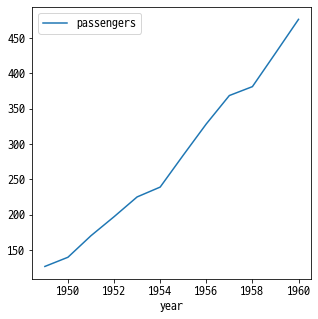

In [5]:
plt.rcParams['figure.figsize'] = (5, 5) 
f2.plot()
plt.show()

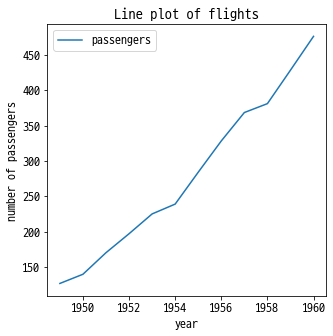

In [6]:
X = f2.index
Y = f2.values.ravel() 

plt.plot(X, Y)
plt.xlabel('year') 
plt.ylabel('number of passengers') 
plt.legend(['passengers']) 
plt.title('Line plot of flights') 
plt.show()

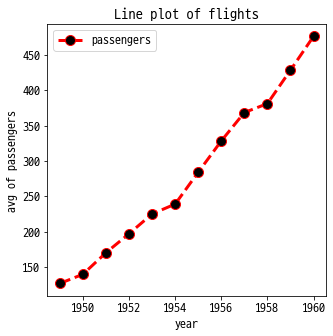

In [7]:
plt.plot(X, Y, color='red', linestyle='dashed', linewidth=3, marker='o', markerfacecolor='black', markersize=10) 
plt.xlabel('year') 
plt.ylabel('avg of passengers') 
plt.legend(['passengers']) 
plt.title('Line plot of flights') 
plt.show()

In [8]:
import numpy as np
f3 = flights.groupby(by='year').agg([np.mean, np.median, np.max]) 
print(f3)

      passengers            
            mean median amax
year                        
1949  126.666667  125.0  148
1950  139.666667  137.5  170
1951  170.166667  169.0  199
1952  197.000000  192.0  242
1953  225.000000  232.0  272
1954  238.916667  231.5  302
1955  284.000000  272.0  364
1956  328.250000  315.0  413
1957  368.416667  351.5  467
1958  381.000000  360.5  505
1959  428.333333  406.5  559
1960  476.166667  461.0  622


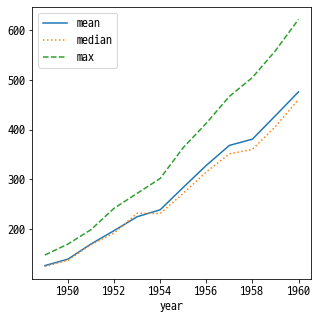

In [16]:
f3.plot(style=['-', ':', '--'])
plt.legend(['mean', 'median', 'max']) 
plt.show()

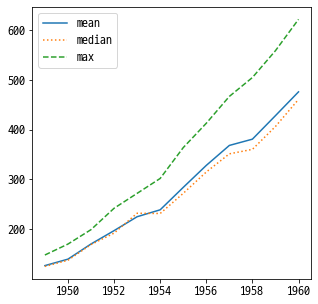

In [13]:
X = f3.index
Y1 = f3.iloc[:, 0].values 
Y2 = f3.iloc[:, 1].values 
Y3 = f3.iloc[:, 2].values 

plt.plot(X, Y1, linestyle='solid', label='mean')
plt.plot(X, Y2, linestyle='dotted', label='median')
plt.plot(X, Y3, linestyle='dashed', label='max')
plt.legend()
plt.show()

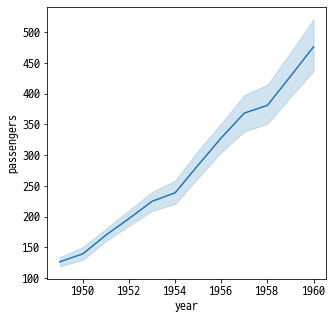

In [24]:
sns.lineplot(data=flights, x='year', y='passengers')
plt.show()

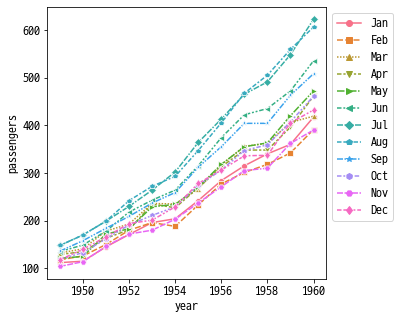

In [26]:
sns.lineplot(data=flights, x='year', y='passengers', hue='month', style='month',
            markers=['o', 's', '^', 'v', '>', '<', 'D', 'p', '*', 'h', 'H', 'd'] )
plt.legend(bbox_to_anchor=(1,1)) 
plt.show()

### 5-2. 누적 연속 그래프: stackplot

In [36]:
import seaborn as sns
healthexp = sns.load_dataset('healthexp').query("Year >= 1992")
healthexp = healthexp.reset_index(drop=True)
print(healthexp)

     Year        Country  Spending_USD  Life_Expectancy
0    1992         Canada      1897.456             77.8
1    1992        Germany      2019.308             76.1
2    1992         France      1651.139             77.5
3    1992  Great Britain       930.701             76.3
4    1992          Japan      1253.415             79.2
..    ...            ...           ...              ...
169  2020        Germany      6938.983             81.1
170  2020         France      5468.418             82.3
171  2020  Great Britain      5018.700             80.4
172  2020          Japan      4665.641             84.7
173  2020            USA     11859.179             77.0

[174 rows x 4 columns]


In [32]:
Country = healthexp['Country'].unique()
Spendings = []
for country in Country:
    spending = healthexp[healthexp['Country']==country]['Spending_USD'].values
    Spendings.append(spending) 
    print(country, len(spending)) 

Canada 29
Germany 29
France 29
Great Britain 29
Japan 29
USA 29


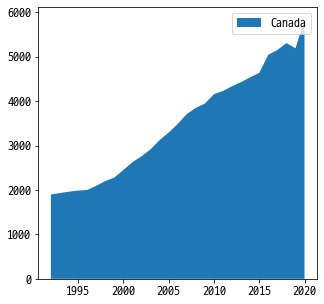

In [50]:
i = 0 
Year = healthexp['Year'].unique()
plt.stackplot(Year, Spendings[i], labels=[Country[i]])
plt.legend()
plt.show()

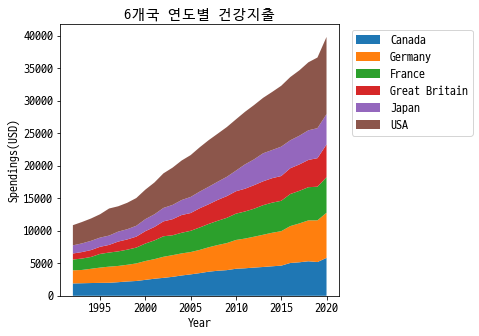

In [51]:
plt.stackplot(Year, Spendings[0], Spendings[1], Spendings[2], Spendings[3], Spendings[4], Spendings[5], labels=Country)
plt.legend(bbox_to_anchor=(1.5, 1))
plt.title('6개국 연도별 건강지출')
plt.xlabel('Year')
plt.ylabel('Spendings(USD)')
plt.show()

### 5-3. 막대 그래프: plot, countplot, barplot

In [52]:
import seaborn as sns
mpg = sns.load_dataset('mpg')
print(mpg)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

In [53]:
m2 = mpg['origin'].value_counts()
print(m2)

usa       249
japan      79
europe     70
Name: origin, dtype: int64


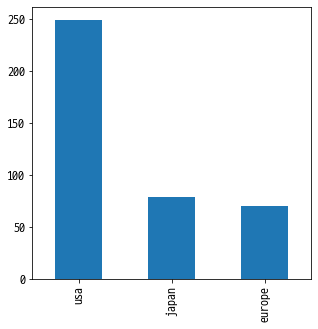

In [57]:
m2.plot(kind='bar')
plt.show()

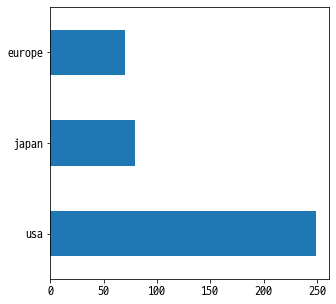

In [58]:
m2.plot(kind='barh') 
plt.show()

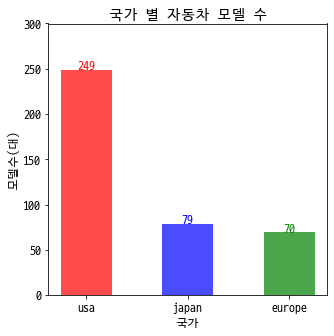

In [59]:
origins = m2.index
counts = m2.values
colors = ['red', 'blue', 'green']

plt.bar(origins, counts, 
        color=colors, 
        width=0.5, alpha=0.7) 

plt.ylim(0, 300) 
plt.title('국가 별 자동차 모델 수') 
plt.xlabel('국가') 
plt.ylabel('모델수(대)') 

for x, y, text, c in zip(range(len(origins)), counts, counts, colors):
    plt.text(x, y, text, horizontalalignment='center', color=c)
plt.show()

In [60]:
from pandas import pivot_table
m3 = pivot_table(index='origin', columns='cylinders', values='name', aggfunc='count', data=mpg)
print(m3)

cylinders    3     4    5     6      8
origin                                
europe     NaN  63.0  3.0   4.0    NaN
japan      4.0  69.0  NaN   6.0    NaN
usa        NaN  72.0  NaN  74.0  103.0


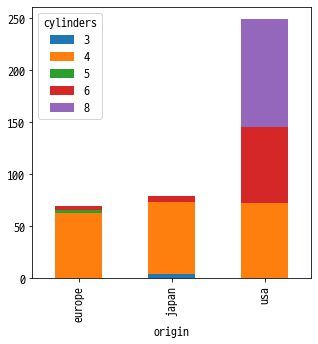

In [61]:
m3.plot(kind='bar', stacked=True)
plt.show()

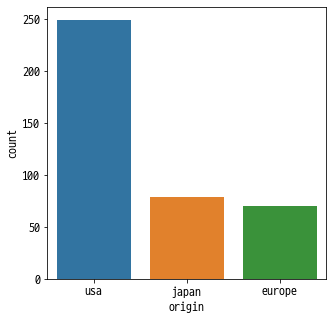

In [62]:
sns.countplot(x='origin', data=mpg)
plt.show()

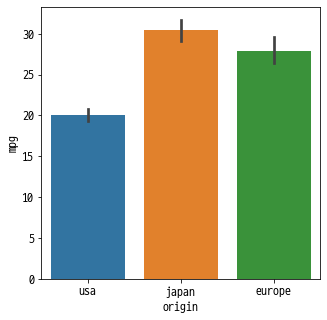

In [63]:
sns.barplot(x='origin', y='mpg', data=mpg)
plt.show()

### 5-4. 히스토그램과 KDE 곡선: hist, histplot

In [64]:
import seaborn as sns
mpg = sns.load_dataset('mpg')
print(mpg)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

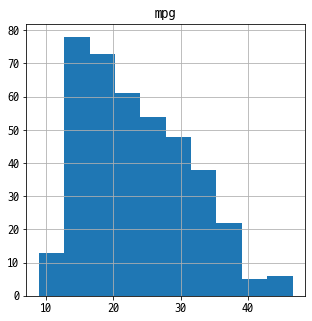

In [65]:
mpg[['mpg']].hist()
plt.show()

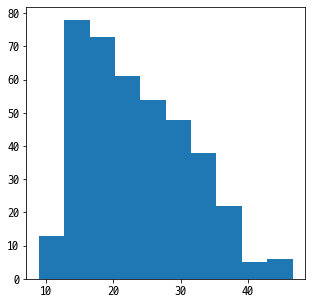

In [66]:
mpgs = mpg['mpg'].values

plt.hist(mpgs)
plt.show()

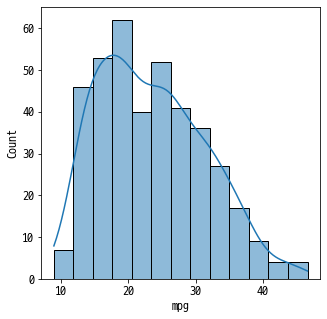

In [67]:
sns.histplot(x='mpg', data=mpg, kde=True)
plt.show()

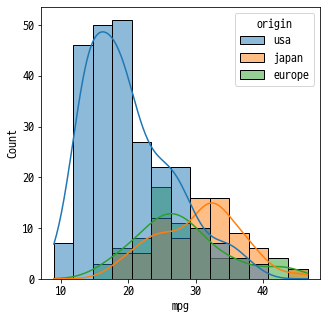

In [68]:
sns.histplot(x='mpg', data=mpg, 
             hue='origin', 
             kde=True) 
plt.show()

### 5-5. 상자 그림과 바이올린 플롯: boxplot, violinplot

In [69]:
import seaborn as sns
mpg = sns.load_dataset('mpg')
print(mpg)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

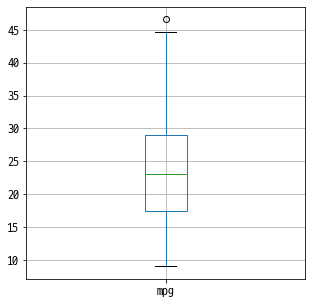

In [70]:
mpg[['mpg']].boxplot()
plt.show()

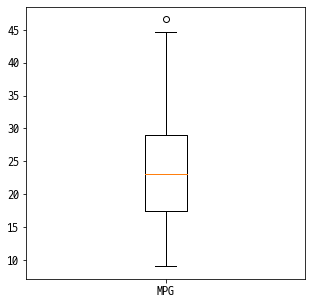

In [71]:
mpgs = mpg['mpg'].values

plt.boxplot(mpgs)
plt.xticks([1], ['MPG']) 
plt.show()

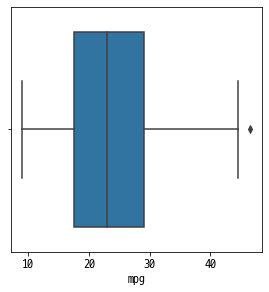

In [76]:
sns.boxplot(x='mpg', data=mpg)
plt.show()

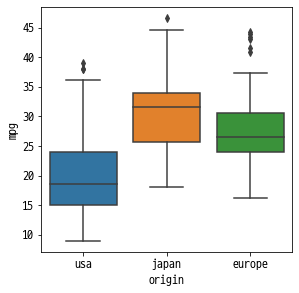

In [77]:
sns.boxplot(x='origin', y='mpg', data=mpg)
plt.show()

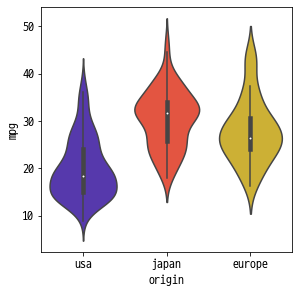

In [78]:
sns.violinplot(x='origin', y='mpg', data=mpg, palette='CMRmap') 
plt.show()

### 5-6. 산점도와 페어 플롯: scatter, scatterplot, pairplot

In [27]:
import seaborn as sns
mpg = sns.load_dataset('mpg').drop(['model_year', 'origin', 'name'], axis=1)
print(mpg)

      mpg  cylinders  displacement  horsepower  weight  acceleration
0    18.0          8         307.0       130.0    3504          12.0
1    15.0          8         350.0       165.0    3693          11.5
2    18.0          8         318.0       150.0    3436          11.0
3    16.0          8         304.0       150.0    3433          12.0
4    17.0          8         302.0       140.0    3449          10.5
..    ...        ...           ...         ...     ...           ...
393  27.0          4         140.0        86.0    2790          15.6
394  44.0          4          97.0        52.0    2130          24.6
395  32.0          4         135.0        84.0    2295          11.6
396  28.0          4         120.0        79.0    2625          18.6
397  31.0          4         119.0        82.0    2720          19.4

[398 rows x 6 columns]


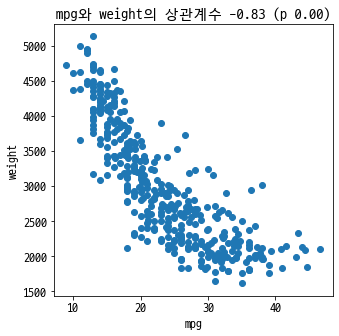

In [28]:
mpgs = mpg['mpg'].values
weights = mpg['weight'].values

plt.scatter(mpgs, weights)
plt.xlabel('mpg')
plt.ylabel('weight')

from scipy.stats import pearsonr
r, p = pearsonr(mpgs, weights)
plt.title('mpg와 weight의 상관계수 {:.2f} (p {:.2f})'.format(r, p))

plt.show()

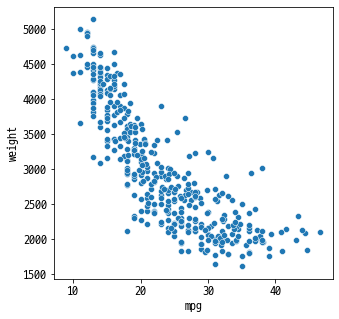

In [29]:
sns.scatterplot(x='mpg', y='weight', data=mpg)
plt.show()

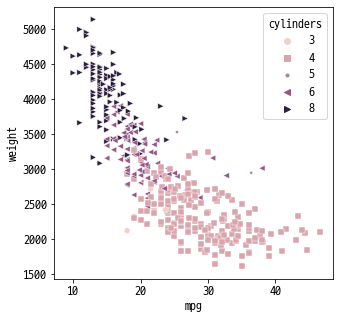

In [35]:
sns.scatterplot(x='mpg', y='weight', data=mpg, 
                hue='cylinders', 
                style='cylinders', markers=['o', 's', '.', '<', '>']) 
plt.show()

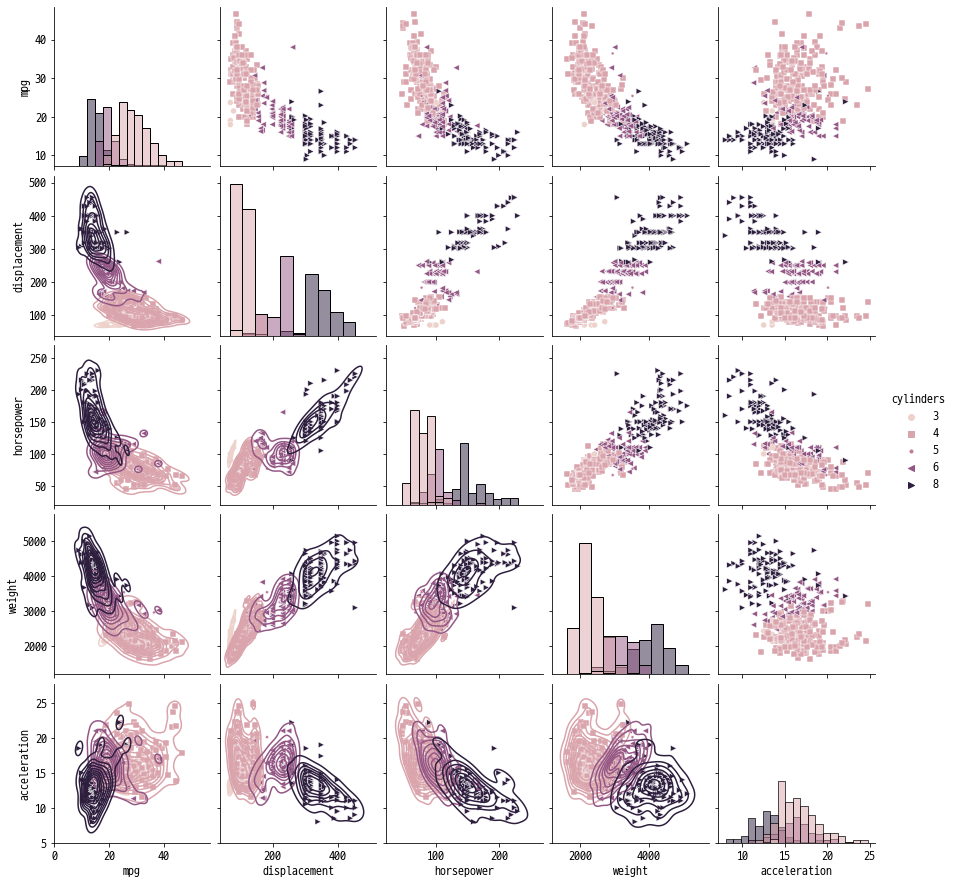

In [43]:
from warnings import filterwarnings 
filterwarnings('ignore') 

pp = sns.pairplot(data=mpg, diag_kind='hist', 
                  hue='cylinders', markers=['o', 's', '.', '<', '>'] ) 
pp.map_lower(sns.kdeplot) 
plt.show()

### 5-7. 파이 차트와 도넛 차트: plot, pie

In [18]:
import seaborn as sns
tips = sns.load_dataset('tips')
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [19]:
t2 = tips.groupby('day').sum()[['tip']]
print(t2)

         tip
day         
Thur  171.83
Fri    51.96
Sat   260.40
Sun   247.39


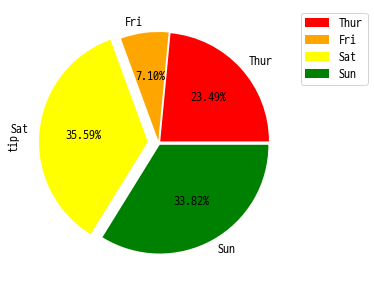

In [30]:
from matplotlib import pyplot as plt
t2.plot(kind='pie', y='tip', autopct="%.2f%%", 
       colors=['red', 'orange', 'yellow', 'green'], 
       explode= [0.02, 0.02, 0.1, 0.02]) 

plt.legend(bbox_to_anchor=(1,1)) 
plt.show()

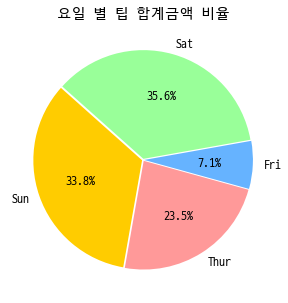

In [31]:
t3 = t2['tip'].values
t3label = t2.index
t3color = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc00']

plt.pie(x=t3, labels=t3label, autopct='%.1f%%', 
        colors=t3color, 
        explode= [0.01, 0.01, 0.01, 0.01],
       startangle=260) 
plt.title("요일 별 팁 합계금액 비율")
plt.show()

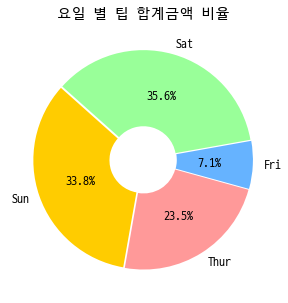

In [32]:
plt.pie(x=t3, labels=t3label, autopct='%.1f%%', 
        colors=t3color,
        explode= [0.01, 0.01, 0.01, 0.01],
       startangle=260, 
        wedgeprops={'width':0.7}) 

plt.title("요일 별 팁 합계금액 비율")
plt.show()

### 5-8. 모자이크 플롯: mosaic

In [16]:
import seaborn as sns
tips = sns.load_dataset('tips')
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [17]:
check_var = ['sex', 'time']
agg = tips[check_var].value_counts()
agg_idx = agg.index
agg_val = agg.values.ravel()
agg_dict = dict(zip(agg_idx, agg_val))
print(agg_dict)

{('Male', 'Dinner'): 124, ('Female', 'Dinner'): 52, ('Female', 'Lunch'): 35, ('Male', 'Lunch'): 33}


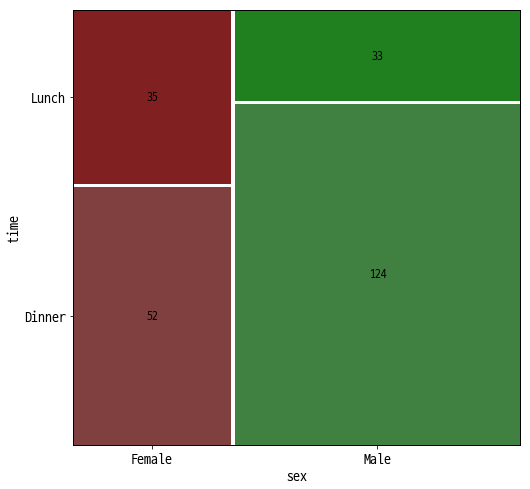

In [18]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(1,1) 
mosaic(data=tips, index=check_var, gap=0.01, 
       labelizer=lambda x: agg_dict[x], 
      ax=ax) 
ax.set_xlabel(check_var[0])
ax.set_ylabel(check_var[1])
plt.show()

### 5-9. 히트맵: heatmap

In [19]:
import seaborn as sns
taxis = sns.load_dataset('taxis')[['passengers', 'distance', 'fare', 'tip', 'tolls']] 
print(taxis)

      passengers  distance  fare   tip  tolls
0              1      1.60   7.0  2.15    0.0
1              1      0.79   5.0  0.00    0.0
2              1      1.37   7.5  2.36    0.0
3              1      7.70  27.0  6.15    0.0
4              3      2.16   9.0  1.10    0.0
...          ...       ...   ...   ...    ...
6428           1      0.75   4.5  1.06    0.0
6429           1     18.74  58.0  0.00    0.0
6430           1      4.14  16.0  0.00    0.0
6431           1      1.12   6.0  0.00    0.0
6432           1      3.85  15.0  3.36    0.0

[6433 rows x 5 columns]


In [21]:
print(taxis.corr(method='pearson'))

            passengers  distance      fare       tip     tolls
passengers    1.000000  0.009411  0.007637  0.021099 -0.002903
distance      0.009411  1.000000  0.920108  0.452589  0.635267
fare          0.007637  0.920108  1.000000  0.488612  0.609307
tip           0.021099  0.452589  0.488612  1.000000  0.413619
tolls        -0.002903  0.635267  0.609307  0.413619  1.000000


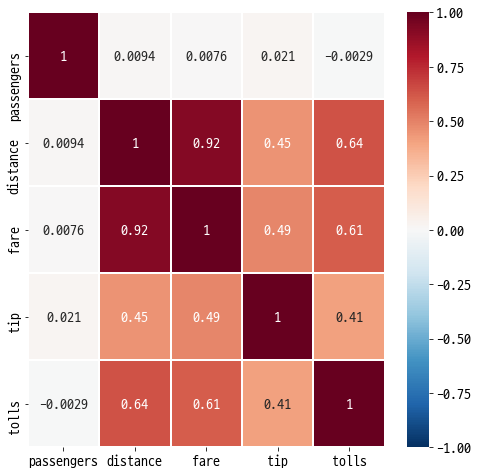

In [23]:
sns.heatmap(taxis.corr(), annot=True, 
           cmap='RdBu_r', 
           vmin=-1, vmax=1, 
           linewidths=0.1, linecolor='white') 
plt.show()

### 5-10. 등고선 그래프: contour, contourf, clabel, colorbar

In [29]:
from pandas import DataFrame, read_csv
route = 'https://raw.githubusercontent.com/algoboni/pythoncodebook_visual1/main/data/2-1_contourPlot'

lats = read_csv(f'{route}/lats.csv', index_col=0).values.ravel() 
lons = read_csv(f'{route}/lons.csv', index_col=0).values.ravel() 
masks = read_csv(f'{route}/masks.csv', index_col=0).values 
sst = read_csv(f'{route}/sst.csv', index_col=0).values 
print(lats[0:9])
print(lons[0:9])
print(masks[0:9])
print(sst[0:9])

[34.175 34.225 34.275 34.325 34.375 34.425 34.475 34.525 34.575]
[125.975 126.025 126.075 126.125 126.175 126.225 126.275 126.325 126.375]
[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 2 1 ... 2 2 2]
 ...
 [1 1 1 ... 2 1 1]
 [1 1 1 ... 2 1 1]
 [1 1 1 ... 1 1 1]]
[[11.43    11.67    11.82    ...      nan      nan      nan]
 [11.13    11.32    11.42    ...      nan      nan      nan]
 [10.82         nan 11.04    ...      nan      nan      nan]
 ...
 [ 9.88998 10.07    10.22    ...      nan 12.98    12.92   ]
 [ 9.81    10.01    10.2     ...      nan 13.29998 13.17   ]
 [ 9.76    10.      10.2     ... 14.01998 13.73998 13.57   ]]


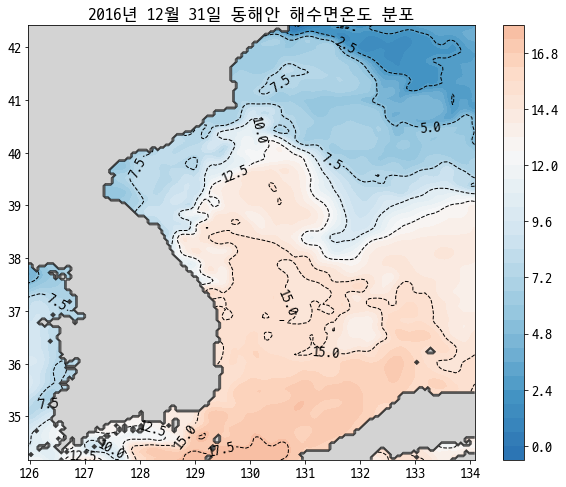

In [30]:
plt.rcParams['figure.figsize'] = (10, 8) 

plt.contour(lons, lats, masks, colors='black', linewidths=0.3)
plt.contourf(lons, lats, masks, colors='lightgray')

sst_contour = plt.contour(lons, lats, sst, colors='black', linewidths=1, linestyles='--')

fill_contour = plt.contourf(lons, lats, sst, levels=30, cmap='RdBu_r', vmin=-5, vmax=30) 
fill_contour.set_clim(-5, 30)

plt.clabel(sst_contour, sst_contour.levels, inline=True)
plt.colorbar()
plt.title("2016년 12월 31일 동해안 해수면온도 분포")
plt.show()

### 5-11. 서브 플롯 그리기: subplots

In [31]:
import seaborn as sns
dia = sns.load_dataset('diamonds')
print(dia)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


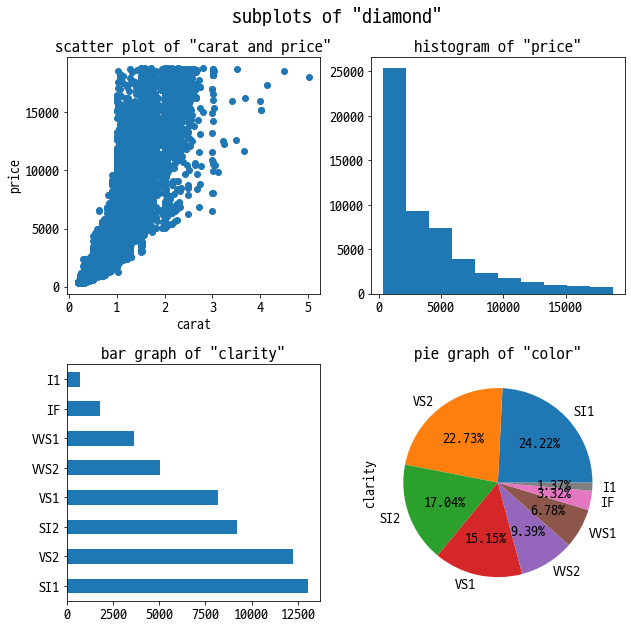

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) 
fig.suptitle('subplots of "diamond"', 
             y=0.95, fontsize=20) 
fig.subplots_adjust(wspace=0.2, hspace=0.3) 

ax1 = axes[0][0] 
ax1.scatter(x='carat', y='price', data=dia)
ax1.set_xlabel('carat') 
ax1.set_ylabel('price')
ax1.set_title('scatter plot of "carat and price"')

ax2 = axes[0][1] 
ax2.hist(x='price', data=dia, bins=10)
ax2.set_title('histogram of "price"')

ax3 = axes[1][0] 
freq = dia['clarity'].value_counts()
freq.plot(kind='barh', ax=ax3) 
ax3.set_title('bar graph of "clarity"')

ax4 = axes[1][1] 
freq2 = dia['color'].value_counts() 
freq.plot(kind='pie', ax=ax4, autopct="%.2f%%")
ax4.set_title('pie graph of "color"')

plt.show()

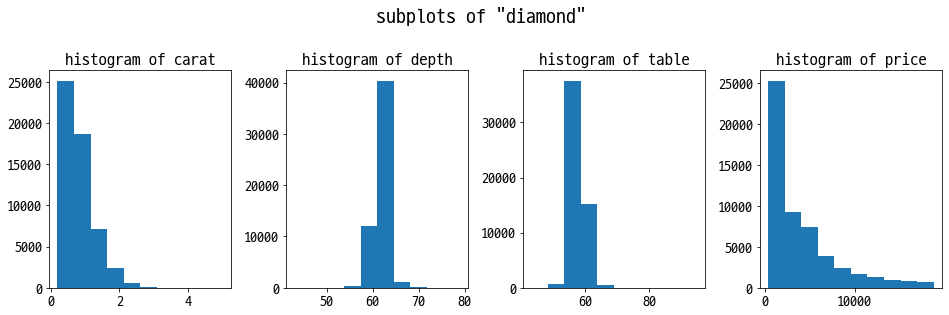

In [36]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4)) 
fig.suptitle('subplots of "diamond"', 
             y=1.1, fontsize=20)
fig.subplots_adjust(wspace=0.3)

features = ['carat', 'depth', 'table', 'price'] 
for ax, feature in zip(axes, features): 
    ax.set_title("histogram of {}".format(feature))
    ax.hist(x=feature, data=dia) 
plt.show()

### 5-12. 트윈 플롯 그리기: twinx

In [37]:
import seaborn as sns
healthexp = sns.load_dataset('healthexp')
print(healthexp)

     Year        Country  Spending_USD  Life_Expectancy
0    1970        Germany       252.311             70.6
1    1970         France       192.143             72.2
2    1970  Great Britain       123.993             71.9
3    1970          Japan       150.437             72.0
4    1970            USA       326.961             70.9
..    ...            ...           ...              ...
269  2020        Germany      6938.983             81.1
270  2020         France      5468.418             82.3
271  2020  Great Britain      5018.700             80.4
272  2020          Japan      4665.641             84.7
273  2020            USA     11859.179             77.0

[274 rows x 4 columns]


In [41]:
germany = healthexp[healthexp['Country']=='Germany'].reset_index(drop=True)
print(germany.head(5))

   Year  Country  Spending_USD  Life_Expectancy
0  1970  Germany       252.311             70.6
1  1971  Germany       298.251             70.8
2  1972  Germany       337.364             71.0
3  1973  Germany       384.541             71.3
4  1974  Germany       452.744             71.5


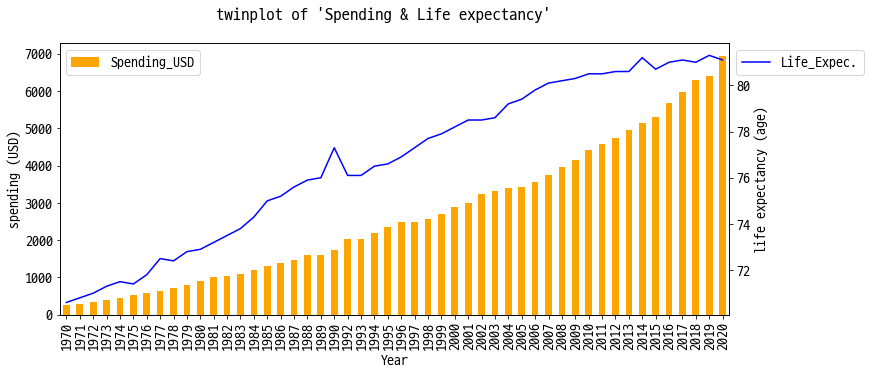

In [44]:
fig, ax1 = plt.subplots(1,1, figsize=(12,5))
ax2 = ax1.twinx() 
plt.suptitle("twinplot of 'Spending & Life expectancy'") 

data2 = germany[['Year','Spending_USD']].set_index('Year') 
data2.plot(color='orange', kind='bar', ax=ax1) 
ax1.legend(labels=['Spending_USD'], bbox_to_anchor=(0.22,1)) 
ax1.set_ylabel('spending (USD)') 

ax2.plot(germany['Life_Expectancy'], color='blue') 
ax2.legend(labels=['Life_Expec.'], bbox_to_anchor=(1,1)) 
ax2.set_ylabel('life expectancy (age)') 

plt.show()

## 연습문제

### 1. 다음은 2021년 국내 학생건강검사 표본조사 원자료 중 일부의 데이터이다. 연속형 변수들에 대해 히스토그램과 상자 그림의 시각화 방법으로 탐색적 분석을 하시오.

In [44]:
# [출처] 교육부, 학생건강정보센터, 학생건강검사 표본조사 원자료 (2021)
# https://www.data.go.kr/data/15100360/fileData.do?recommendDataYn=Y
from pandas import read_csv
df = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook_visual1/main/data/1-4_studentHealth2021.csv').filter(['도시규모', '시도', '학교급', '성별', '키', '몸무게'])
print(df)

             도시규모  시도 학교급 성별          키        몸무게
0     1. 대도시/중소도시  울산   초  남  134.60001  44.799999
1     1. 대도시/중소도시  경기   초  남  149.70000  63.799999
2     1. 대도시/중소도시  울산   초  남  147.60001  59.000000
3     1. 대도시/중소도시  서울   초  남  143.70000  50.200001
4     1. 대도시/중소도시  울산   초  남  148.00000  68.199997
...           ...  ..  .. ..        ...        ...
5079  1. 대도시/중소도시  충북   고  여  159.10001  68.400002
5080  1. 대도시/중소도시  경기   고  여  162.89999  74.699997
5081  1. 대도시/중소도시  인천   고  여  165.30000  67.000000
5082  1. 대도시/중소도시  전남   고  여  162.50000  72.300003
5083  1. 대도시/중소도시  경남   고  여  159.50000  74.000000

[5084 rows x 6 columns]


### 2. 데이터프레임 df의 연속형 변수들에 대해 산점도와 히트맵의 시각화 방법으로 변수 간 관계를 확인하시오. (단, 두 그래프를 1행 2열의 서브 플롯으로 시각화 한다.)

### 3. 데이터프레임 df의 범주형 변수 '학교급' 별 빈도수를 막대 그래프로 시각화 하고, '학교급' 별 '키' 및 '몸무게'의 평균을 90%의 신뢰구간을 포함한 막대 그래프를 각각 시각화한 후, '키'와 '몸무게'에 대한 산점도를 그릴 때 데이터 포인트를 '학교급'에 따라 구분하여 시각화 하시오. (단, 네개의 그래프를 2행 2열의 서브 플롯으로 시각화 한다.)

### 4. 데이터프레임 df의 ‘키’와 ‘몸무게’에 대하여 KDE 곡선을 포함한 히스토그램을 그리되 모든 그래프에서 ‘성별’이 구분되도록 각각 시각화 하고, ‘키’와 ‘몸무게’에 대하여 산점도를 그리되 하나는 ‘성별’의 구분 없이 하고 다른 하나는 ‘성별’이 구분되도록 각각 시각화 하시오. (단, 네 개의 그래프를 2행 2열의 서브 플롯으로 시각화 한다.)

### 5. 데이터프레임 df의 범주형 변수 ‘시도’ 별 ‘키’와 ‘몸무게’ 평균을 하나의 선 그래프로 시각화  하시오. (단, 변수 ‘시도’를 x축에, 변수 ‘키’와 ‘몸무게’를 각각 y축의 왼쪽과 오른쪽에 배치하여 트윈 플롯으로 시각화 한다.)